In [1]:
# In this section, we're gonna builda kernel density estimation
# Firstly, import the 'numpy', 'matplotlib.pyplot' and 'math' packages
import numpy as np
import matplotlib.pyplot as plt
import math

def ker_smoothing(X, k):
    X = np.sort(X)
    # Compute the range of data vector
    X_min = X[0]
    X_max = X[-1]
    data_points = np.linspace(X_min, X_max, 1000)
    result = np.zeros((1000,))
    if k != 'Uniform' and k != 'Epan' and k != 'Biweight' and k != 'Triweight' and k != 'Gaussian':
        return "Name of the kernel is incorrect!!!"
    else:    
        def ker_density(point, X, k):        
            # Compute the necessary quantities
            sig = np.std(X)
            n = len(X)
            # Next, we construct the functions of kernels
            c = np.array([1.843, 2.345, 2.778, 3.154, 1.059])
            band = c*sig*n**(-1/5)
            matrix = np.array([X,X,X,X,X])
            matrix = matrix.transpose()
            reg_vec = (matrix - point)/band
            def K(x, k):
                vec = np.zeros((n,))
                for i, xi in enumerate(x):
                    if abs(xi) > 1:
                        vec[i] = 0
                    else:
                        if k == 'Uniform':
                            vec[i] = 1/2
                        elif k == 'Epan':
                            vec[i] = 3/4*(1-xi**2)
                        elif k == 'Biweight':
                            vec[i] = 15/16*(1-xi**2)**2
                        elif k == 'Triweight':
                            vec[i] = 35/32*(1-xi**2)**3
                        elif k == 'Gaussian':
                            vec[i] = 1/math.sqrt(2*np.pi)*math.exp(-1/2*xi**2)
                return vec
            value = np.zeros((reg_vec.shape[0],reg_vec.shape[1]))
            type_kernel = ["Uniform", "Epan", "Biweight", "Triweight", "Gaussian"]
            for j in range(0, reg_vec.shape[1]-1):
                value[:,j] = K(reg_vec[:,j], type_kernel[j])
            pdf = np.sum(value, axis = 0)
            if k == 'Uniform':
                return pdf[0]
            elif k == 'Epan':
                return pdf[1]
            elif k == 'Biweight':
                return pdf[2]
            elif k == 'Triweight':
                return pdf[3]
            elif k == 'Gaussian':
                return pdf[4]
    for i, l in enumerate(data_points):
        result[i] = ker_density(l, X, k)
    fig = plt.figure
    _ = plt.plot(data_points, result)
    return fig

In [2]:
# In this cell, we will use the data of Yahoo Finance about companies on NASDAQ to investigate the market capitalization 
# as well as of these companies using the kernel density estimator we just constructed.
import csv

f = open('nasdaq-companylist.csv','r')
f_data = csv.reader(f)
data = []
for i in f_data:
    data.append(i)

header = data[0]
data = data[1:]

# So, now, we extract the information of market capitalisation, "MarketCap", and the sale, "LastSale"
# Index of "MarketCap" and "LastSale" variables:
MarCap_index = header.index("MarketCap")
Sale_index = header.index("LastSale")

# Firstly, we deal with the missing values in both "MarketCap" and "LastSale" variables by eliminate them out of the data set

mar_cap = []
sale = []
for i in data:
    a_marcap = i[MarCap_index]
    a_sale = i[Sale_index]
    # Since the scale of market capitalisation is in million or billion, we have to convert them into the same scale, billion
    if a_sale == "n/a" or a_sale == " " or a_marcap == "n/a" or a_marcap == " ":
        data.remove(i)
    elif a_marcap[-1] == "M":
        mar_cap.append(float(a_marcap[1:len(a_marcap)-1])/1000)
    elif a_marcap[-1] == "B":
        mar_cap.append(float(a_marcap[1:len(a_marcap)-1]))
        sale.append(float(a_sale))

# Convert "mar_cap" and "sale" lists into arrays
marcap_array = np.array(mar_cap)
sale_array = np.array(sale)

# Provide some insight of market capitalisation variable
mean_marcap = np.mean(marcap_array)
median_marcap = np.median(marcap_array)
std_marcap = np.std(marcap_array)
min_marcap = np.amin(marcap_array)
max_marcap = np.amax(marcap_array)

dic_marcap = {
    "Mean": mean_marcap,
    "Median": median_marcap,
    "Standard Deviation": std_marcap,
    "Min": min_marcap,
    "Max": max_marcap
}

print(dic_marcap)

# Look at the dictionary, we can see that it is more likely there are some outliers in our "MarketCap" variable
# Sine, the maximum is much higher than the median. As a result, these outliers could stretch the mean far away from the median
# So, we will discard the outliers by trimming off the first and the last 1%

length_marcap = len(marcap_array)
# Sort the variable
sort_marcap = np.sort(marcap_array)
new_marcap = sort_marcap[math.floor(0.01*length_marcap):math.ceil(0.99*length_marcap)]

# Check again
mean_new_marcap = np.mean(new_marcap)
median_new_marcap = np.median(new_marcap)
std_new_marcap = np.std(new_marcap)
min_new_marcap = np.amin(new_marcap)
max_new_marcap = np.amax(new_marcap)

dic_new_marcap = {
    "Mean": mean_new_marcap,
    "Median": median_new_marcap,
    "Standard Deviation": std_new_marcap,
    "Min": min_new_marcap,
    "Max": max_new_marcap
}
print(dic_new_marcap)

# Do the same process with "LastSale" variable
# Provide some insight of market capitalisation variable
mean_sale = np.mean(sale_array)
median_sale = np.median(sale_array)
std_sale = np.std(sale_array)
min_sale = np.amin(sale_array)
max_sale = np.amax(sale_array)

dic_sale = {
    "Mean": mean_sale,
    "Median": median_sale,
    "Standard Deviation": std_sale,
    "Min": min_sale,
    "Max": max_sale
}

print(dic_sale)

# Look at the dictionary, we can see that it is more likely there are some outliers in our "LastSale" variable
# Sine, the maximum is much higher than the median. As a result, these outliers could stretch the mean far away from the median
# So, we will discard the outliers by trimming off the first and the last 1%

length_sale = len(sale_array)
# Sort the variable
sort_sale = np.sort(sale_array)
new_sale = sort_sale[math.floor(0.01*length_sale):math.ceil(0.99*length_sale)]

# Check again
mean_new_sale = np.mean(new_sale)
median_new_sale = np.median(new_sale)
std_new_sale = np.std(new_sale)
min_new_sale = np.amin(new_sale)
max_new_sale = np.amax(new_sale)

dic_new_sale = {
    "Mean": mean_new_sale,
    "Median": median_new_sale,
    "Standard Deviation": std_new_sale,
    "Min": min_new_sale,
    "Max": max_new_sale
}
print(dic_new_sale)

{'Mean': 3.1503183509282855, 'Median': 0.29222000000000004, 'Standard Deviation': 23.052181778776475, 'Min': 0.0011200000000000001, 'Max': 563.68}
{'Mean': 1.5851910620126253, 'Median': 0.29222000000000004, 'Standard Deviation': 4.298413369400805, 'Min': 0.00282, 'Max': 46.84}
{'Mean': 56.39655918918919, 'Median': 39.8, 'Standard Deviation': 67.06118878349899, 'Min': 2.855, 'Max': 753.22}
{'Mean': 52.00209201101928, 'Median': 39.8, 'Standard Deviation': 41.924247478345464, 'Min': 5.45, 'Max': 330.22}


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

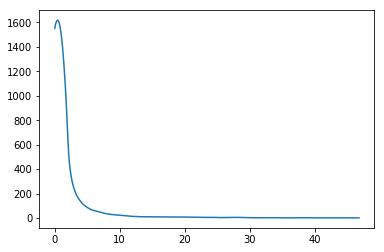

In [3]:
# Now, apply the kernel smoothing estimator to new_marcap variable and check the result
# We're gonna use the Epanechnikov kernel
ker_smoothing(new_marcap, "Epan")

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

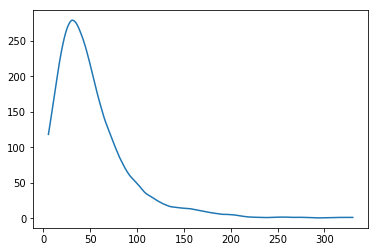

In [4]:
# Now, apply the kernel smoothing estimator to new_marcap variable and check the result
# We're goona use the Epanechnikov kernel
ker_smoothing(new_sale, "Epan")

{'Transportation', 'Health Care', 'n/a', 'Capital Goods', 'Energy', 'Basic Industries', 'Technology', 'Miscellaneous', 'Consumer Durables', 'Public Utilities', 'Finance', 'Consumer Non-Durables', 'Consumer Services'}


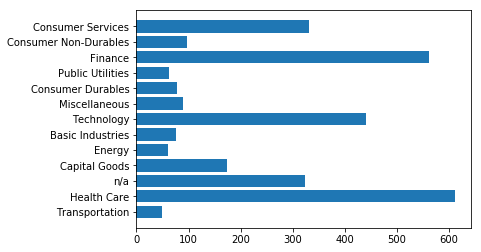

In [5]:
# Now, one more question rises is, what is the difference in market capitalisation and sale between the sectors
# To this end, we will split the data set in to many sub data sets, each of them represent the data of each sector

# Check the data after cleaning by, firstly, extract the information of sectors
sector_index = header.index('Sector')
sec = [i[sector_index] for i in data]
print(set(sec))

# Since, we have 13 sectors, we need to split it in to 13 lists. To this end, since creating 13 lists manually is time consuming
# We will make up a list of list, each sub-list in this list represent a list of data about market capitalisation and 
# sale of companies in each sector
list_sector = []
for i in set(sec):
    each_sector = []
    for j in data:
        if j[sector_index] == i:
            a_sec = []
            a_sec.append(j[MarCap_index])
            a_sec.append(j[Sale_index])
            each_sector.append(a_sec)
    list_sector.append(each_sector)

# So, now, each list in the "list_sector" contains the data of each sector
# To have the general view, we first have to do some general statistics
num_companies = [len(i) for i in list_sector]
dic_sector = {}
for i, com in enumerate(set(sec)):
    dic_sector[com] = num_companies[i]

# Visualise it
plt.figure
plt.barh(list(set(sec)), num_companies)
plt.show

# We can see, the number of health care and financial organisations is highest, followed by tech companies and comsumer services
# It's worth saying that the group of these three sector have the most segment in NASDAQ, they may drive the price of stocks
# the most on NASDAQ. But we are not sure about that. The influence in market also depends on the market capitalisation. Think 
# about a sector which has a small number of companies, but they account for most of market capitalisation in NASDAQ

# To provide the deep insight, we study the market capitalisation of these groups
# Create two empty lists, these lists, which are actually lists of lists, contains the data about market capitalisation 
# and sale of each sector
list_marcap = []
list_sale = []
for ii in list_sector:
    each_marcap = []
    each_sale = []
    for j in ii:
        if j[0] == "n/a" or j[0] == " " or j[1] == "n/a" or j[1] == " ":
            ii.remove(j)
        else:
            if j[0][-1] == "M":
                each_marcap.append(float(j[0][1:len(j[0])-1])/1000)
            elif j[0][-1] == "B":
                each_marcap.append(float(j[0][1:len(j[0])-1]))
                each_sale.append(float(j[1]))
    list_marcap.append(each_marcap)
    list_sale.append(each_sale)

[0.01668866 0.12734993 0.02122482 0.02421969 0.00485741 0.00638307
 0.45717497 0.03143109 0.00662723 0.02075865 0.06569181 0.03174229
 0.18585039]


<function matplotlib.pyplot.show(*args, **kw)>

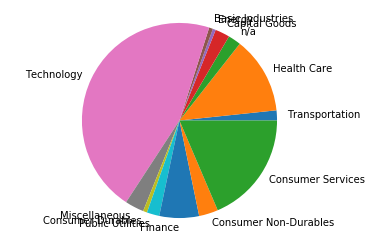

In [6]:
# Now, it's time to do statistical inference, firstly, with market capitalisation
# Sum of marcap for each sector (in billion USD)
sum_marcap = np.array([np.sum(i) for i in list_marcap])

# Percentage of each sector's market capitalisation
prc_marcap = sum_marcap/np.sum(sum_marcap)
print(prc_marcap)

# Visualise it using pie chart
plt.figure
plt.pie(prc_marcap, labels = list(set(sec)), startangle = 0)
plt.axis('equal')
plt.show

# Now, it turns out that the tech companies account for the largest capitalisation on NASDAQ, even though the number of tech 
# companies is only ranked in the 3rd place. The health care sector seems to be most crowded in the market, however, their
# market capitalisation is only in the 3rd place, implying that they are small and medium companies. This case is also applied
# to the financial sectors

{'Transportation': 0.75, 'Health Care': 0.21, 'n/a': 0.09, 'Capital Goods': 0.29, 'Energy': 0.15, 'Basic Industries': 0.21, 'Technology': 0.63, 'Miscellaneous': 0.25, 'Consumer Durables': 0.24, 'Public Utilities': 0.44, 'Finance': 0.27, 'Consumer Non-Durables': 0.28, 'Consumer Services': 0.67}
{'Transportation': 3.23, 'Health Care': 1.96, 'n/a': 0.66, 'Capital Goods': 1.31, 'Energy': 0.74, 'Basic Industries': 0.82, 'Technology': 9.7, 'Miscellaneous': 3.24, 'Consumer Durables': 0.84, 'Public Utilities': 3.06, 'Finance': 1.21, 'Consumer Non-Durables': 3.04, 'Consumer Services': 5.34}


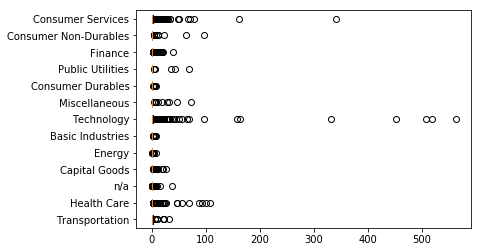

In [7]:
# Now, let's see the characteristics of each sector using the boxplot
plt.figure
plt.boxplot(list_marcap, vert = False, labels = list(set(sec)))
plt.show

# As we predicted, companies in health care sectors have mostly small and medium size. Tech companies is the source of outliers
# since it has some very large-scale companies with huge capitalisation, but there are also many small and medium companies.

# Compare the median between sector's capitalisation. Result shows that they are pretty the same. This is not a surprising 
# result showing that every sector (in median) have the same size
median_marcap_sec = [np.median(i) for i in list_marcap]
dic_marcap_median_sec = {}
for i, sector_name in enumerate(list(set(sec))):
    dic_marcap_median_sec[sector_name] = round(median_marcap_sec[i], 2)

# However, when we look at the mean, it is totally different since in the technology sector, there are some very huge companies
mean_marcap_sec = [np.mean(i) for i in list_marcap]
dic_marcap_mean_sec = {}
for i, sector_name in enumerate(list(set(sec))):
    dic_marcap_mean_sec[sector_name] = round(mean_marcap_sec[i], 2)

print(dic_marcap_median_sec)
print(dic_marcap_mean_sec)

In [ ]:
# To check whether the tech companies drive the stock price in NASDAQ significantly or not, we need to investigate more data,
# about the liquidity, index of NASDAQ and stock price of each company. That project is upcoming soon.